# CNN to train the model

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory as image_dataset 

import matplotlib.pyplot as plt
import numpy as np
import PIL
import pandas as pd
import pathlib
import os

In [6]:
data = pd.read_csv('data/set.csv').drop(columns=['DateTime'])
data

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetimestamp
0,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578,299706
1,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255,299707
2,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502,299708
3,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867,299709
4,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888,299710
...,...,...,...,...,...,...,...,...,...
8440,1314.0,1101.0,539.0,1374.0,1729.0,21.9,29.3,0.7568,309058
8441,1163.0,1027.0,604.0,1264.0,1269.0,24.3,23.7,0.7119,309059
8442,1142.0,1063.0,603.0,1241.0,1092.0,26.9,18.3,0.6406,309060
8443,1003.0,961.0,702.0,1041.0,770.0,28.3,13.5,0.5139,309061


## Results method

In [3]:
results = pd.DataFrame(columns=['Model', 'mse', 'mae', 'rmse', 'mape', 'r2'])
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


def appendError(model, testy, y_pred):
    model_name = str(type(model).__name__)
    mse = mean_squared_error(testy, y_pred)
    mae = mean_absolute_error(testy, y_pred)
    rmse = root_mean_squared_error(testy, y_pred)
    mape = mean_absolute_percentage_error(testy, y_pred)
    r2 = r2_score(testy, y_pred)
    return pd.DataFrame([{
        'Model': model_name,
        'mse': mse, 
        'mae': mae, 
        'mae': mae, 
        'rmse': rmse, 
        'mape': mape, 
        'r2': r2
    }])

# Image dataset?

In [7]:
batch = 32
image_size = 224
data_dir = pathlib.Path('./imagesTML/textINimage/CO/').with_suffix('')
data_dir.glob
shuffle = False
seed = 123123
split = 0.2

In [31]:
train_ds, val_ds = image_dataset(
    data_dir,
    validation_split=split,
    subset='both',
    seed=seed,
    labels=None,
    label_mode='int',
    image_size=(image_size, image_size),
    color_mode='grayscale',
    shuffle=shuffle
)
val_ds

Found 8445 files belonging to 1 classes.
Using 6756 files for training.
Using 1689 files for validation.


<_PrefetchDataset element_spec=TensorSpec(shape=(None, 224, 224, 1), dtype=tf.float32, name=None)>

In [27]:
X = data.drop(columns=['PT08.S1(CO)'])
y = data['PT08.S1(CO)']
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    random_state=seed, 
    test_size=split, 
    shuffle=shuffle
)
y_val

6756    1176.0
6757    1147.0
6758    1294.0
6759    1256.0
6760    1205.0
         ...  
8440    1314.0
8441    1163.0
8442    1142.0
8443    1003.0
8444    1071.0
Name: PT08.S1(CO), Length: 1689, dtype: float64

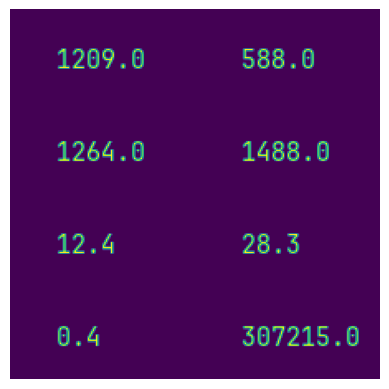

In [9]:
for images in val_ds.take(1):
    # Plot the first image from the batch
    plt.figure()
    plt.imshow(images[0].numpy())  # Convert to numpy array and display as image
    plt.axis('off')  # Hide axis
    plt.show()


## Model

In [36]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(image_size, image_size, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,
              metrics=['mse'])


In [38]:
y_ds = tf.data.Dataset.from_tensor_slices(y_train.values)
train_dataset = tf.data.Dataset.zip((train_ds, y_ds))

y_ds_val =  tf.data.Dataset.from_tensor_slices(y_val.values)
val_dataset = tf.data.Dataset.zip((val_ds, y_ds_val))

In [39]:
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=50
)


Epoch 1/50


ValueError: in user code:

    File "/home/miiky/progar/python/chamba/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/miiky/progar/python/chamba/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/miiky/progar/python/chamba/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/miiky/progar/python/chamba/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/home/miiky/progar/python/chamba/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/miiky/progar/python/chamba/.venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_4' (type Sequential).
    
    Input 0 of layer "conv2d_12" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 224, 224, 1)
    
    Call arguments received by layer 'sequential_4' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 224, 224, 1), dtype=float32)
      • training=True
      • mask=None


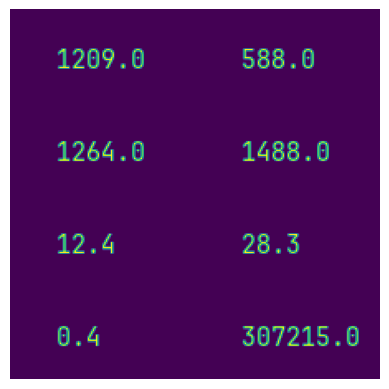

tf.Tensor(1176.0, shape=(), dtype=float64)


In [26]:
for images, target in val_dataset.take(1):
    # Plot the first image from the batch
    plt.figure()
    plt.imshow(images[0].numpy())  # Convert to numpy array and display as image
    plt.axis('off')  # Hide axis
    plt.show()
    print(target)

# Model with arrays
The image dataset doesn't seems to work for me T-T.

## Image loading

In [48]:
def preprocess_image(image_path):
    img = load_img(image_path)
    
    img_array = img_to_array(img)
    
    return img_array

In [43]:
images = []
target = data['PT08.S1(CO)']

# get all the images (i dont know too much about this process)
datadir = 'imagesTML/textINimage/CO/'

In [49]:
for image in os.listdir(datadir):
    if image == '.ipynb_checkpoint':
        continue
    img = preprocess_image(os.path.join(datadir, image))
    images.append(img)

In [50]:
images = np.array(images)
target = np.array(target)

## Model Creation

In [53]:
model = Sequential([
    layers.Input(shape=images.shape[1:]),
    layers.Conv2D(64, (5,5), activation='relu'),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.Conv2D(16, (2,2), activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(8, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(8, activation='selu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(1)
])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

2024-04-18 20:53:35.420724: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3253813248 exceeds 10% of free system memory.


Epoch 1/50


2024-04-18 20:53:41.524062: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 396492800 exceeds 10% of free system memory.
2024-04-18 20:53:41.774503: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 194658304 exceeds 10% of free system memory.
2024-04-18 20:53:42.591818: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 194658304 exceeds 10% of free system memory.
2024-04-18 20:53:42.740606: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 396492800 exceeds 10% of free system memory.


169/169 [==============================] - 813s 5s/step - loss: 1125184.8750 - val_loss: 672600.8750
Epoch 2/50
169/169 [==============================] - 826s 5s/step - loss: 175449.1250 - val_loss: 38335.7344
Epoch 3/50
169/169 [==============================] - 822s 5s/step - loss: 101043.1484 - val_loss: 43881.3438
Epoch 4/50
169/169 [==============================] - 826s 5s/step - loss: 94647.9844 - val_loss: 39346.5000
Epoch 5/50
169/169 [==============================] - 853s 5s/step - loss: 83124.8203 - val_loss: 41204.2031
Epoch 6/50
169/169 [==============================] - 802s 5s/step - loss: 79954.4531 - val_loss: 39629.6758
Epoch 7/50
169/169 [==============================] - 852s 5s/step - loss: 72169.5469 - val_loss: 42751.8477
Epoch 8/50
169/169 [==============================] - 805s 5s/step - loss: 67860.5312 - val_loss: 43956.6875
Epoch 9/50
169/169 [==============================] - ETA: 0s - loss: 64342.9102

In [ ]:
y_pred = model.predict(X_test)
results = pd.concat([results, appendError(model, y_test, y_pred)])